# Get Libraries and Create Mock Data

In [1]:
library(dplyr)
library(tidyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




## TEMPORARY: Create Data

In [2]:
id <- c(1:1000)
a <- rnorm(1000, mean=10)
b <- rnorm(1000, mean=10)
c <- rnorm(1000, mean=10) + c(rep(0, 250), rnorm(250, mean=0.15, sd=0.025), rnorm(250, mean=0.4, sd=0.075), rnorm(250, mean=0.2, sd=0.1))
d <- rnorm(1000, mean=10) + c(rep(0, 250), rnorm(250, mean=-0.25, sd=0.025), rnorm(250, mean=-0.1, sd=0.3), runif(250, min=0, max=0.2))
f <- rnorm(1000, mean=10) + c(rep(0, 250), rnorm(250, mean=-0.02, sd=0.025), rnorm(250, mean=-0.03, sd=0.1), rnorm(250, mean=0.08, sd=0.2))
g <- rnorm(1000, mean=10) + c(rep(0, 250), rnorm(250, mean=2, sd=0.025), rnorm(250, mean=0.8, sd=0.3), runif(250, min=-0.9, max=0.2))


batch <- factor(c(rep(1, 250), rep(4, 250), rep(3, 250), rep(4, 250)))
data <- matrix(data=c(a, b, c, d, f, g), ncol=6, byrow=FALSE)

# Normalize and Scale Data + PCA

In [3]:
data <- log10(10000 * data)
data <- scale(drop_na(data.frame(data)))

In [4]:
data_pcs <- prcomp(data)$x

# Perform Harmony

In [5]:
data_harmony <- harmony::HarmonyMatrix(data_pcs, meta_data=batch, do_pca=FALSE)

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony converged after 6 iterations



# Output Harmony Adjusted and Uncorrected Files

In [10]:
uncorrected_dir <- ".\\output\\data\\uncorrected"
harmony_dir <- ".\\output\\data\\harmony"
liger_dir <- ".\\output\\data\\liger"
combat_dir <- ".\\output\\data\\combat"

system(paste("mkdir -p ", uncorrected_dir, sep=""))
system(paste("mkdir -p ", harmony_dir, sep=""))
system(paste("mkdir -p ", liger_dir, sep=""))
system(paste("mkdir -p ", combat_dir, sep=""))

write.csv(data_pcs, paste(uncorrected_dir, "\\data_", last(last(strsplit(uncorrected_dir, "\\\\|[^[:print:]]"))), ".csv", sep=""), row.names = FALSE)
write.csv(data_harmony, paste(harmony_dir, "\\data_", last(last(strsplit(harmony_dir, "\\\\|[^[:print:]]"))), ".csv", sep=""), row.names = FALSE)

[1] 0

[1] 0

[1] 0

[1] 0

# Run kBET and print outputs

Warning message in if (class(knn) == "list") {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(knn) == "list") {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(knn) == "list") {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(knn) == "list") {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(knn) == "list") {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(knn) == "list") {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(knn) == "list") {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(knn) == "list") {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(knn) == "list") {:


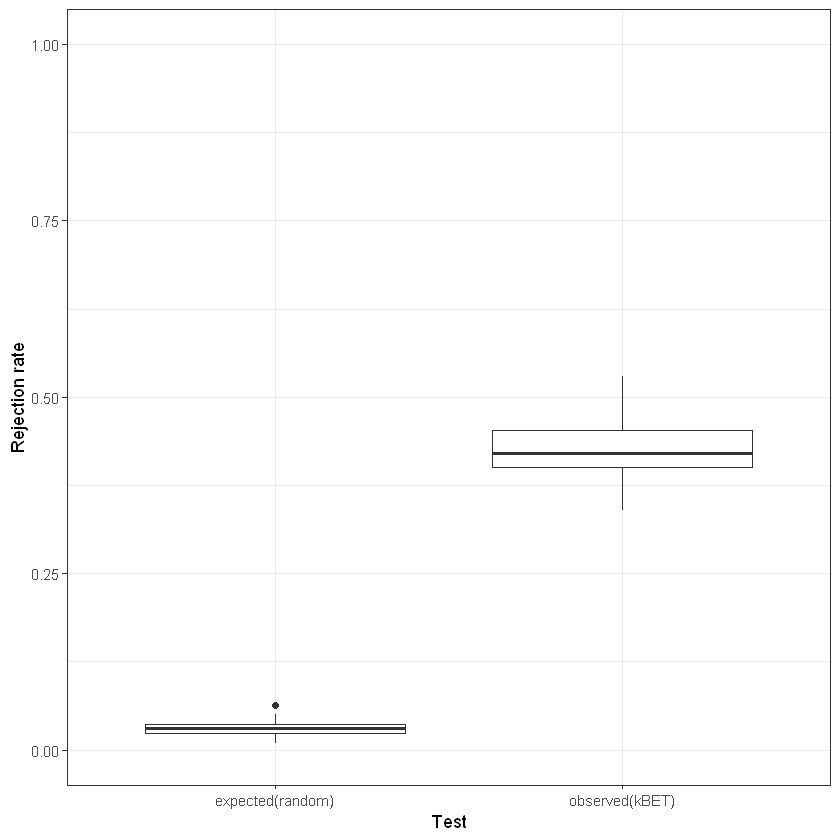

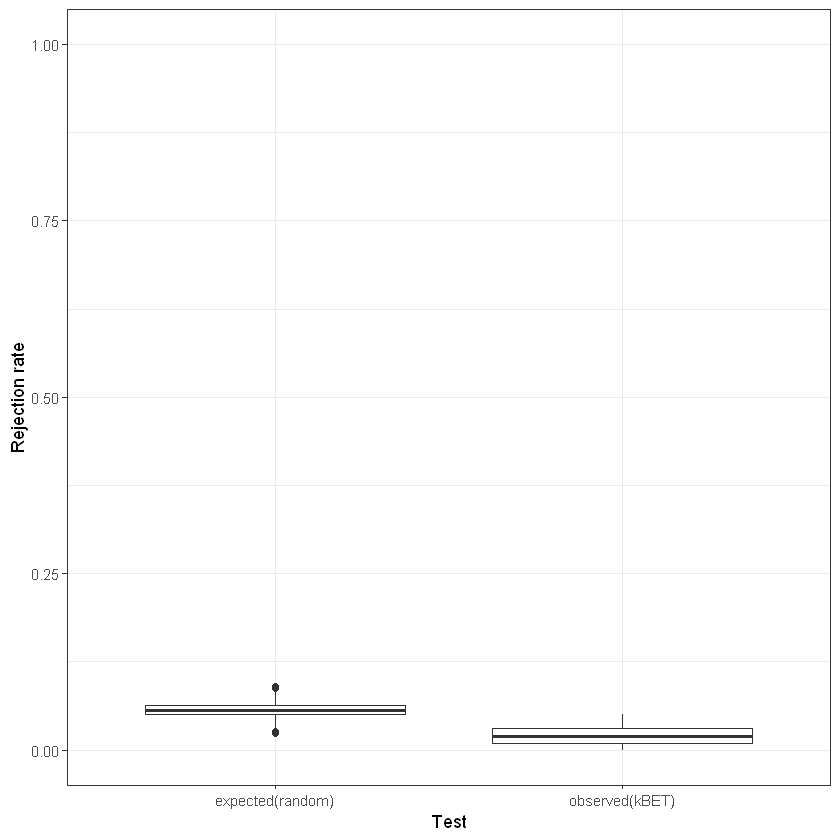

In [11]:
kBET.uncorrected <- kBET::kBET(data_pcs, batch, do.pca=FALSE)$summary
kBET.harmony <- kBET::kBET(data_harmony, batch, do.pca=FALSE)$summary

In [12]:
uncorrected_dir <- ".\\output\\kBET\\uncorrected"
harmony_dir <- ".\\output\\kBET\\harmony"
liger_dir <- ".\\output\\kBET\\liger"
combat_dir <- ".\\output\\kBET\\combat"

system(paste("mkdir -p ", uncorrected_dir, sep=""))
system(paste("mkdir -p ", harmony_dir, sep=""))
system(paste("mkdir -p ", liger_dir, sep=""))
system(paste("mkdir -p ", combat_dir, sep=""))

write.csv(kBET.uncorrected, paste(uncorrected_dir, "\\kBET_", last(last(strsplit(uncorrected_dir, "\\\\|[^[:print:]]"))), ".csv", sep=""), row.names = TRUE)
write.csv(kBET.harmony, paste(harmony_dir, "\\kBET_", last(last(strsplit(harmony_dir, "\\\\|[^[:print:]]"))), ".csv", sep=""), row.names = TRUE)

[1] 0

[1] 0

[1] 0

[1] 0

# Calculate LISI and print outputs

In [14]:
uncorrected_lisi <- lisi::compute_lisi(data_pcs, as.data.frame(batch), "batch")#This part is not modular!
harmony_lisi <- lisi::compute_lisi(data_harmony, as.data.frame(batch), "batch")#This part is not modular!

LISI.uncorrected = c(summary(uncorrected_lisi$batch))
LISI.uncorrected = as.data.frame(LISI.uncorrected)

LISI.harmony = c(summary(uncorrected_lisi$batch))
LISI.harmony = as.data.frame(LISI.harmony)

In [15]:
uncorrected_dir <- ".\\output\\lisi\\uncorrected"
harmony_dir <- ".\\output\\lisi\\harmony"
liger_dir <- ".\\output\\lisi\\liger"
combat_dir <- ".\\output\\lisi\\combat"

system(paste("mkdir -p ", uncorrected_dir, sep=""))
system(paste("mkdir -p ", harmony_dir, sep=""))
system(paste("mkdir -p ", liger_dir, sep=""))
system(paste("mkdir -p ", combat_dir, sep=""))

write.csv(LISI.uncorrected, paste(uncorrected_dir, "\\LISI_", last(last(strsplit(uncorrected_dir, "\\\\|[^[:print:]]"))), ".csv", sep=""), row.names = TRUE)
write.csv(LISI.harmony, paste(harmony_dir, "\\LISI_", last(last(strsplit(harmony_dir, "\\\\|[^[:print:]]"))), ".csv", sep=""), row.names = TRUE)

[1] 0

[1] 0

[1] 0

[1] 0

In [16]:
LISI.harmony

,LISI.harmony
,<dbl>
Min.,1.183857
1st Qu.,2.083413
Median,2.376044
Mean,2.356758
3rd Qu.,2.687097
Max.,2.998784
